# Data Analysis

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df_raw = pd.read_csv("./WinLoseDataset.csv")
df = df_raw.iloc[:, 1:].copy()
df.columns = df.columns.str.strip()

y = df["Ganaste o Perdiste la partida"].map({"Gané": 1, "Perdí": 0}).astype(int)
X = df.drop(columns = ["Ganaste o Perdiste la partida"])

## Previous hours played

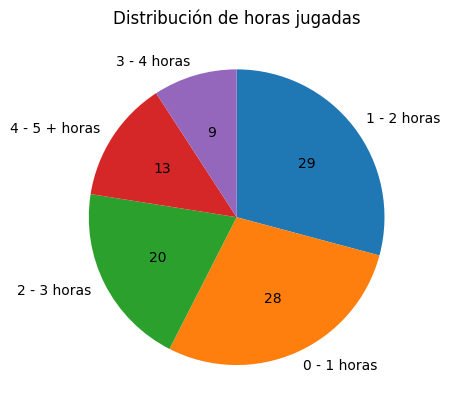

In [ ]:
col = df.columns[0]
counts = df[col].value_counts()

counts.plot(
    kind="pie",
    autopct="%1.0f",
    startangle=90,
    counterclock=False
)
plt.title("Distribución de horas jugadas")
plt.ylabel("")
plt.show()


The distribution of hours played before starting a match shows a clear concentration in the lower ranges, with most players logging only between zero and two hours of prior play. This suggests that the majority of sessions begin without extended warm-up periods, which may reflect a more casual playstyle or time-limited gaming habits. A smaller portion of matches are preceded by two to three hours of play, indicating a moderate but less frequent engagement level. Very long sessions of three to five or more hours are the least common, showing that extended play before a new game is not typical in this dataset. The imbalance implies that the dataset is dominated by short pre-game activity, while longer play sessions are underrepresented. If this variable were used in predictive modeling, the dominance of short play durations could bias results toward outcomes associated with lighter engagement, making it harder to draw strong conclusions about players who consistently game for longer periods.

## Hours played

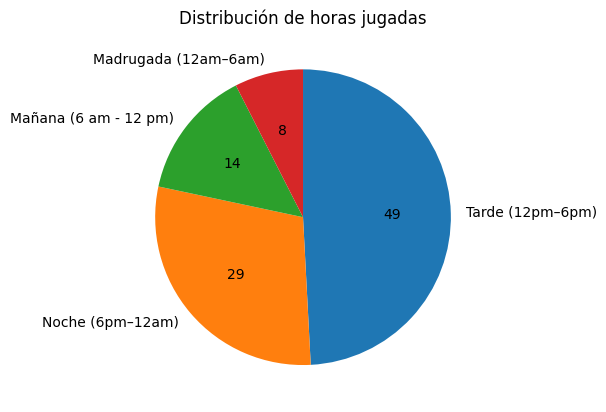

In [ ]:
col = df.columns[1]
counts = df[col].value_counts()

counts.plot(
    kind="pie",
    autopct="%1.0f",
    startangle=90,
    counterclock=False
)
plt.title("Distribución de hora cuando juegan")
plt.ylabel("")
plt.show()

The distribution of playtime by time of day is heavily concentrated in the afternoon (12 pm–6 pm), which accounts for nearly half of all sessions in the dataset. The evening period (6 pm–12 am) is also well represented, covering close to a third of the data. In contrast, morning play (6 am–12 pm) is less common, and late-night play during the early hours (12 am–6 am) is rare, forming only a small fraction. This imbalance means that most of the dataset reflects behavior in afternoon and evening contexts, while morning and late-night gaming are underrepresented. In a machine learning context, this could introduce bias: algorithms may learn patterns more strongly associated with afternoon and evening play, while predictions for players who game in the morning or late night could be less reliable due to sparse data in those categories.

## Game type

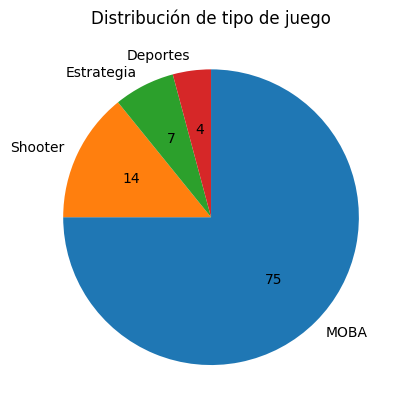

In [21]:
col = df.columns[2]
counts = df[col].value_counts()

counts.plot(
    kind="pie",
    autopct="%1.0f",
    startangle=90,
    counterclock=False
)
plt.title("Distribución de tipo de juego")
plt.ylabel("")
plt.show()

The distribution of game types is dominated by MOBA, which accounts for three quarters of all recorded sessions. Shooter games make up the next largest portion but still represent less than a fifth of the data, while Strategy and Sports games appear only occasionally. This imbalance shows that the dataset is strongly skewed toward MOBA play, meaning most patterns the models learn will be associated with that genre. From a machine learning perspective, this creates a high risk of bias: k-NN will often classify new points as MOBA simply because of majority voting, Logistic Regression will fit stronger coefficients toward MOBA-related features while underestimating minority genres, and Naive Bayes may produce unreliable probability estimates for rare categories due to insufficient examples. As a result, predictions for Sports or Strategy sessions may be inaccurate unless the dataset is balanced or techniques such as resampling, class weighting, or collecting more data for minority categories are applied. For this reason, we decided that it would be best to combine other data types into a class "otros" this way evaluate only with MOBA or "otros"

## Played with friends

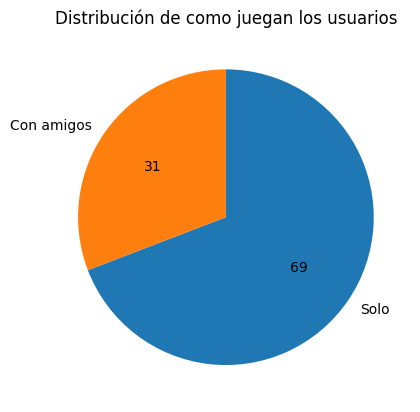

In [24]:
col = df.columns[3]
counts = df[col].value_counts()

counts.plot(
    kind="pie",
    autopct="%1.0f",
    startangle=90,
    counterclock=False
)
plt.title("Distribución de como juegan los usuarios")
plt.ylabel("")
plt.show()

The distribution of play style shows that most users in the dataset prefer to play alone, with solo sessions making up about two-thirds of the total. Playing with friends is less common, representing only around one-third of the cases. This imbalance highlights a strong tendency toward individual play, which may reflect user habits or the nature of the games included in the dataset. For machine learning models, this uneven distribution can cause bias: algorithms like k-NN will often predict “Solo” by default due to the majority, Logistic Regression may assign stronger weight to solo-related features while underestimating friend-related patterns, and Naive Bayes could struggle with lower-frequency friend data unless smoothing is applied. If predicting play style is an important task, balancing the dataset through resampling or weighting would help improve reliability for the minority class.

## Tiredness level  

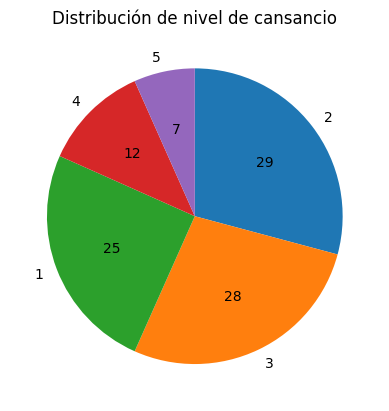

In [26]:
col = df.columns[4]
counts = df[col].value_counts()

counts.plot(
    kind="pie",
    autopct="%1.0f",
    startangle=90,
    counterclock=False
)
plt.title("Distribución de nivel de cansancio")
plt.ylabel("")
plt.show()

The distribution of fatigue levels before playing is fairly balanced across the lower to medium values, with levels 1, 2, and 3 all appearing with similar frequency. Level 2 is the most common, followed closely by level 3, while level 1 also represents a substantial portion of the data. Higher fatigue levels, such as 4 and 5, occur much less frequently, together forming only a small minority. This pattern indicates that most players in the dataset tend to start their sessions with low to moderate fatigue, while high exhaustion before gaming is relatively rare. In terms of machine learning, the imbalance could bias algorithms toward predicting moderate fatigue levels more often, since they dominate the dataset. For k-NN, minority fatigue cases may be misclassified due to sparse representation among neighbors; Logistic Regression may assign weaker coefficients to higher fatigue levels; and Naive Bayes may underestimate rare categories without sufficient smoothing. This means predictions for very fatigued players (levels 4 and 5) may be less accurate unless the dataset is balanced or adjusted.

## Number of consecutive wins

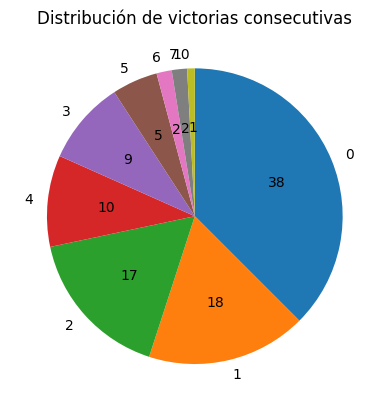

In [29]:
col = df.columns[5]
counts = df[col].value_counts()

counts.plot(
    kind="pie",
    autopct="%1.0f",
    startangle=90,
    counterclock=False
)
plt.title("Distribución de victorias consecutivas")
plt.ylabel("")
plt.show()

The distribution of consecutive victories is strongly skewed toward the lowest values. Nearly 40% of cases show players starting with zero consecutive wins, and another large portion is concentrated at one or two victories. Together, these three categories account for the majority of the dataset. As the number of consecutive wins increases, the frequency drops sharply, with values above four becoming progressively rare and double-digit streaks almost absent. This pattern indicates that long winning streaks are exceptional events, while most players either start fresh or maintain only short streaks. For machine learning models, this imbalance creates a bias toward predicting low streak values. k-NN will frequently classify new samples as having short streaks due to the dominance of these categories in neighbor sets, Logistic Regression may fail to capture the signal of rare long streaks since their coefficients will be underrepresented, and Naive Bayes will assign very low probability to higher streak counts without smoothing. As a result, predictions for players with unusually long winning streaks will likely be less accurate, unless the dataset is balanced or the model is adapted to handle rare events.

## Wins

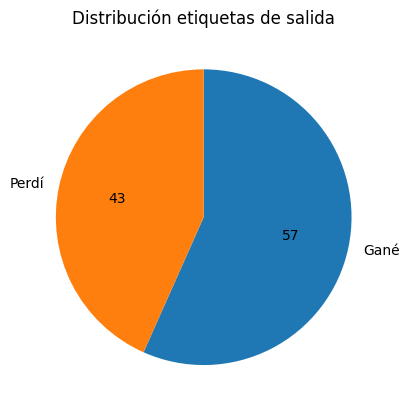

In [31]:
col = df.columns[-1]
counts = df[col].value_counts()

counts.plot(
    kind="pie",
    autopct="%1.0f",
    startangle=90,
    counterclock=False
)
plt.title("Distribución etiquetas de salida")
plt.ylabel("")
plt.show()

The distribution of output labels is relatively balanced, with 57% of matches labeled as “Gané” and 43% as “Perdí.” This near-even split is beneficial for supervised learning, since the target variable does not suffer from severe class imbalance. Models like k-NN, Logistic Regression, and Naive Bayes will be less prone to defaulting to a single dominant class, making their predictions more reliable across both outcomes. However, the slight tilt toward “Gané” could still bias models to favor that label marginally, especially in algorithms sensitive to class proportions such as Naive Bayes. To ensure fairness, performance metrics should be evaluated beyond simple accuracy—using precision, recall, and F1 scores for both classes—to confirm that the model is not systematically better at predicting wins than losses. Overall, the balance in this dataset provides a solid foundation for training classification models without the need for heavy rebalancing techniques.